In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
len(data)

404290

In [5]:
for i in data['question1']:
    if pd.isnull(i) or type(i)==np.float or type(i)==float:
        i = ''
    i =  bytes(i, encoding = 'utf-8')
    i = i.decode('ascii','ignore').lower()
    i = i.replace('\n','')

In [6]:
for i in range(len(data)):
    if type(data['question2'][i])==float or type(data['question2'][i])==np.float:
        print (i)

105780
201841


In [7]:
data['question2'][201841]

nan

In [8]:
data=data.drop(data.index[[105780,201841]])
data = data.reset_index(drop=True)

In [9]:
for i in data['question2']:
    if pd.isnull(i) or type(i)==np.float or type(i)==float:
        i = ''
    i =  bytes(i, encoding = 'utf-8')
    i = i.decode('ascii','ignore').lower()
    i = i.replace('\n','')

In [10]:
# random_idx = np.random.permutation(len(data))
# train_threshold = int(round(0.7*len(data)))
# validation_threshold = int(round((0.7+0.1)*len(data)))
    
# train_set = data.iloc[random_idx[:train_threshold]]
# validation_set = data.iloc[random_idx[train_threshold:validation_threshold]]
# test_set = data.iloc[random_idx[validation_threshold:]]
    
   


In [11]:
data['question1']

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
5         Astrology: I am a Capricorn Sun Cap moon and c...
6                                       Should I buy tiago?
7                            How can I be a good geologist?
8                           When do you use シ instead of し?
9         Motorola (company): Can I hack my Charter Moto...
10        Method to find separation of slits using fresn...
11              How do I read and find my YouTube comments?
12                     What can make Physics easy to learn?
13              What was your first sexual experience like?
14        What are the laws to change your status from a...
15        What would a Trump presidency mean for current...
16                             What does

In [12]:
# X_train,y_train = train_set.drop("is_duplicate", axis=1), train_set["is_duplicate"]
# X_test,y_test = test_set.drop("is_duplicate", axis=1), test_set["is_duplicate"]
# X_validation,y_validation = validation_set.drop("is_duplicate", axis=1), validation_set["is_duplicate"]

In [13]:
# print('Total number of question pairs for training: {}'.format(len(data)))
# print('Duplicate pairs: {}%'.format(round(data['is_duplicate'].mean()*100, 2)))
# qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
# print('Total number of questions in the training data: {}'.format(len(
#     np.unique(qids))))
# print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

# plt.figure(figsize=(12, 5))
# plt.hist(qids.value_counts(), bins=50)
# plt.yscale('log', nonposy='clip')
# plt.title('Log-Histogram of question appearance counts')
# plt.xlabel('Number of occurences of question')
# plt.ylabel('Number of questions')
# print()
# plt.show()

### Feature Engineering

In [14]:
def calculate_len(question):
    return len(question.split())

In [15]:
data['q1_len']=data['question1'].apply(calculate_len,1)

In [16]:
data['q2_len']=data['question2'].apply(calculate_len,1)

In [17]:
data

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,16,16
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,4,11
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,8,8
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,9,9


In [19]:
data['question2'].iloc[0].split()

['What',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market?']

In [20]:
def words_duplicate(row):
    duplicate = len(set(row['question1'].split()).intersection(set(row['question2'].split())))
   
   
    return duplicate

In [21]:
def dup_percent(row):
    duplicate = len(set(row['question1'].split()).intersection(set(row['question2'].split())))
   
    avg_len = float((row['q1_len']+row['q2_len'])/2)
    percent = float(duplicate/avg_len)
    return percent

In [22]:
data['duplicates']=data.apply(words_duplicate,1)

In [23]:
data['dup_percent']=data.apply(dup_percent,1)

In [24]:
def loadGloveModel(gloveFile="glove.6B.200d.txt"):
    print ("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in f:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [25]:
model =loadGloveModel()
#print (model['hello'])


Loading Glove Model
Done. 400000  words loaded!


In [26]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import time
from sklearn.linear_model import LogisticRegression
import os

from nltk.corpus import stopwords
nltk.download()
nltk.download("stopwords")
stops = set(stopwords.words("english"))
from collections import Counter

%matplotlib inline 


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuxiong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
data['token_1'] = data.apply(lambda x: nltk.word_tokenize(x["question1"]), 1)

In [28]:
data['token_2'] =  data.apply(lambda x: nltk.word_tokenize(x["question2"]), 1)

In [29]:
def embedding1(row, embedding=model, dim=200):
    """
    Function that vectorize phrases from a counter
    """
    ctr = 0.0
    vec = np.zeros(dim)
    for token in row['token_1']:
        if token in embedding:
            vec += embedding[token].astype(float)
            ctr += 1
    if ctr == 0 :
        return vec
    else:
        return vec / float(ctr)

In [30]:
f=[]
for i in range(len(data)):
    f.append(embedding1(data.iloc[i]))

In [31]:
data['embedding1']=f

In [32]:
def embedding2(row, embedding=model, dim=200):
    """
    Function that vectorize phrases from a counter
    """
    ctr = 0.0
    vec = np.zeros(dim)
    for token in row['token_2']:
        if token in embedding:
            vec += embedding[token].astype(float)
            ctr += 1
    if ctr == 0 :
        return vec
    else:
        return vec / float(ctr)

In [33]:
g=[]
for i in range(len(data)):
    g.append(embedding2(data.iloc[i]))

In [34]:
data['embedding2']=g

In [35]:
type(data['embedding1'].iloc[0])

numpy.ndarray

### cosine similarity

In [36]:
bag_of_word_tokenizer = CountVectorizer(stop_words="english", max_features=5000)
q1_matrix = bag_of_word_tokenizer.fit_transform(data["question1"]).astype(np.float)
q2_matrix = bag_of_word_tokenizer.fit_transform(data["question2"]).astype(np.float)

In [37]:
cosine_sim = [cosine_similarity(q1_matrix[i], q2_matrix[i])[0][0] for i in range(len(data))]
data["cosine_sim"] = cosine_sim

### Euclidian distance of embedding vecotrs

In [38]:
euc_dis_emb = [np.linalg.norm(data['embedding1'][i]-data['embedding2'][i]) for i in range(len(data))]
data['euc_dis_emb']= euc_dis_emb

In [39]:
data

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,duplicates,dup_percent,token_1,token_2,embedding1,embedding2,cosine_sim,euc_dis_emb
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,10,0.769231,"[What, is, the, step, by, step, guide, to, inv...","[What, is, the, step, by, step, guide, to, inv...","[0.13575935714285714, 0.4509330714285715, -0.0...","[0.10830258333333333, 0.4477535833333333, -0.0...",0.000000,0.544414
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13,4,0.380952,"[What, is, the, story, of, Kohinoor, (, Koh-i-...","[What, would, happen, if, the, Indian, governm...","[0.09140642857142857, 0.3371512857142857, 0.03...","[0.14736108333333334, 0.20139991666666668, -0....",0.000000,2.038951
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10,3,0.250000,"[How, can, I, increase, the, speed, of, my, in...","[How, can, Internet, speed, be, increased, by,...","[0.251330675, 0.21253391666666674, -0.10505975...","[0.090278, 0.252940875, -0.2230956375, -0.1725...",0.000000,1.574142
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11,9,0,0.000000,"[Why, am, I, mentally, very, lonely, ?, How, c...","[Find, the, remainder, when, [, math, ], 23^, ...","[0.28600888888888887, 0.23124444444444445, 0.0...","[-0.007573273333333334, 0.3298268666666667, -0...",0.000000,2.951989
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13,7,2,0.200000,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water, ?]","[-0.10426207142857144, 0.27937069285714283, -0...","[0.13243085714285716, 0.1609322142857143, -0.1...",0.250000,2.144337
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,16,16,7,0.437500,"[Astrology, :, I, am, a, Capricorn, Sun, Cap, ...","[I, 'm, a, triple, Capricorn, (, Sun, ,, Moon,...","[0.1857150333333333, 0.24904094000000004, -0.0...","[0.19466423333333333, 0.24774534, -0.097047660...",0.000000,1.243827
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,4,11,0,0.000000,"[Should, I, buy, tiago, ?]","[What, keeps, childern, active, and, far, from...","[0.25575666666666663, 0.215473, 0.149526666666...","[0.1594454, 0.24810738, -0.1635737, -0.1307018...",0.000000,3.715565
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,7,9,4,0.500000,"[How, can, I, be, a, good, geologist, ?]","[What, should, I, do, to, be, a, great, geolog...","[0.3175896666666666, 0.26017333333333337, 0.01...","[0.34009599999999995, 0.298555, -0.02527926249...",0.000000,1.142486
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,8,8,6,0.750000,"[When, do, you, use, シ, instead, of, し, ?]","[When, do, you, use, ``, &, '', instead, of, `...","[0.3837388333333333, 0.3987800000000001, 0.088...","[0.2453019166666666, 0.4923133333333334, 0.059...",0.000000,1.857901
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,9,9,3,0.333333,"[Motorola, (, company, ), :, Can, I, hack, my,...","[How, do, I, hack, Motorola, DCX3400, for, fre...","[0.19556, 0.4272994285714286, -0.1174814285714...","[0.2224533333333333, 0.4812243333333333, -0.25...",0.000000,2.816123


In [40]:
from sklearn.neighbors import DistanceMetric

In [41]:
data['embedding1'][0].reshape(1,200)

array([[ 1.35759357e-01,  4.50933071e-01, -3.86131429e-02,
        -3.36125714e-02, -2.20873643e-02, -8.76521429e-02,
        -2.23296429e-01, -8.54402786e-02, -2.39886429e-03,
         9.85657143e-02,  1.00311214e-01,  2.26015000e-01,
         6.86778571e-02, -7.79245714e-02,  2.93395429e-01,
        -7.20997143e-02, -1.59670100e-02,  2.48216714e-01,
        -3.97000000e-04, -1.52431000e-01,  1.61199536e-01,
         2.87475714e+00, -1.30223071e-01,  8.94507357e-02,
         2.15821764e-01,  6.84390000e-02, -1.16135071e-01,
         3.58758571e-01,  1.03449214e-01, -7.38265000e-03,
        -3.84551429e-02, -2.47251807e-01, -9.73006571e-02,
        -3.64689286e-02,  2.25141429e-02, -4.07432143e-02,
        -4.72764000e-01, -3.47896786e-01, -1.94737857e-02,
        -8.39207143e-02,  2.40426429e-02, -1.19351543e-01,
         2.53342857e-02,  1.85733571e-01, -2.33263071e-01,
         1.61768857e-01,  3.01353214e-01, -5.48378571e-03,
        -2.50282857e-02,  1.25736143e-01, -6.91628571e-0

In [42]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise(np.append(data['embedding1'][0].reshape(1,200),data['embedding2'][0].reshape(1,200),axis=0))[0][1]

5.982999036785717

In [43]:
manh_dis_emb=[dist.pairwise(np.append(data['embedding1'][i].reshape(1,200),data['embedding2'][i].reshape(1,200),axis=0))[0][1] for i in range(len(data))]




In [44]:
data['manh_dis_emb'] = manh_dis_emb

In [48]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,404278,404279,404280,404281,404282,404283,404284,404285,404286,404287
id,0,1,2,3,4,5,6,7,8,9,...,404280,404281,404282,404283,404284,404285,404286,404287,404288,404289
qid1,1,3,5,7,9,11,13,15,17,19,...,537922,99131,1931,537924,537926,433578,18840,537928,537930,537932
qid2,2,4,6,8,10,12,14,16,18,20,...,537923,81495,16773,537925,537927,379845,155606,537929,537931,537933
question1,What is the step by step guide to invest in sh...,What is the story of Kohinoor (Koh-i-Noor) Dia...,How can I increase the speed of my internet co...,Why am I mentally very lonely? How can I solve...,"Which one dissolve in water quikly sugar, salt...",Astrology: I am a Capricorn Sun Cap moon and c...,Should I buy tiago?,How can I be a good geologist?,When do you use シ instead of し?,Motorola (company): Can I hack my Charter Moto...,...,What are some outfit ideas to wear to a frat p...,Why is Manaphy childish in Pokémon Ranger and ...,How does a long distance relationship work?,What do you think of the removal of the MagSaf...,What does Jainism say about homosexuality?,How many keywords are there in the Racket prog...,Do you believe there is life after death?,What is one coin?,What is the approx annual cost of living while...,What is like to have sex with cousin?
question2,What is the step by step guide to invest in sh...,What would happen if the Indian government sto...,How can Internet speed be increased by hacking...,Find the remainder when [math]23^{24}[/math] i...,Which fish would survive in salt water?,"I'm a triple Capricorn (Sun, Moon and ascendan...",What keeps childern active and far from phone ...,What should I do to be a great geologist?,"When do you use ""&"" instead of ""and""?",How do I hack Motorola DCX3400 for free internet?,...,What are some outfit ideas wear to a frat them...,Why is Manaphy annoying in Pokemon ranger and ...,How are long distance relationships maintained?,What will the CPU upgrade to the 2016 Apple Ma...,What does Jainism say about Gays and Homosexua...,How many keywords are there in PERL Programmin...,Is it true that there is life after death?,What's this coin?,I am having little hairfall problem but I want...,What is it like to have sex with your cousin?
is_duplicate,0,0,0,0,0,1,0,1,0,0,...,1,1,1,0,1,0,1,0,0,0
q1_len,14,8,14,11,13,16,4,7,8,9,...,11,13,7,16,6,14,8,4,17,8
q2_len,12,13,10,9,7,16,11,9,8,9,...,11,13,6,12,8,13,9,3,25,10
duplicates,10,4,3,0,2,7,0,4,6,3,...,10,7,3,4,5,9,5,1,1,8
dup_percent,0.769231,0.380952,0.25,0,0.2,0.4375,0,0.5,0.75,0.333333,...,0.909091,0.538462,0.461538,0.285714,0.714286,0.666667,0.588235,0.285714,0.047619,0.888889


In [49]:
data['abs_len'] = abs(data['q1_len']-data['q2_len'])

### unbalanced xgboost on useful column


In [ ]:
# useful_col =['dup_percent', 'cosine_sim','euc_dis_emb','manh_dis_emb']

In [ ]:
# data[useful_col]

In [ ]:
# random_idx = np.random.permutation(len(data))
# train_threshold = int(round(0.7*len(data)))
# validation_threshold = int(round((0.7+0.1)*len(data)))
# train_set = data.iloc[random_idx[:train_threshold]]
# validation_set = data.iloc[random_idx[train_threshold:validation_threshold]]
# test_set = data.iloc[random_idx[validation_threshold:]]

In [ ]:
# X_train,Y_train = train_set.drop("is_duplicate", axis=1), train_set["is_duplicate"]
# X_test,Y_test = test_set.drop("is_duplicate", axis=1), test_set["is_duplicate"]
# X_validation,Y_validation = validation_set.drop("is_duplicate", axis=1), validation_set["is_duplicate"]

In [ ]:
# import xgboost as xgb

# # Set our parameters for xgboost
# params = {}
# params['objective'] = 'binary:logistic'
# params['eval_metric'] = 'logloss'
# params['eta'] = 0.02
# params['max_depth'] = 4

# d_train = xgb.DMatrix(X_train[useful_col], label=Y_train)
# d_valid = xgb.DMatrix(X_validation[useful_col], label=Y_validation)

# watchlist = [(d_train, 'train'), (d_valid, 'valid')]

# bst1 = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

In [ ]:
# from sklearn.metrics import log_loss
# d_test = xgb.DMatrix(X_test[useful_col])
# p_test = bst1.predict(d_test)
# log_loss(Y_test,p_test)

### reblanced xgboost with useful column

In [ ]:

# pos_train = X_train[Y_train == 1]
# neg_train = X_train[Y_train == 0]


In [ ]:


# # Now we oversample the negative class
# # There is likely a much more elegant way to do this...
# p = 0.165
# scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
# while scale > 1:
#     neg_train = pd.concat([neg_train, neg_train])
#     scale -=1
# neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
# print(len(pos_train) / (len(pos_train) + len(neg_train)))

# x_train = pd.concat([pos_train, neg_train])
# y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
# del pos_train, neg_train

In [89]:
from sklearn.cross_validation import train_test_split
import xgboost as xgb

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

/Users/yuxiong/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
# params = {}
# params['objective'] = 'binary:logistic'
# params['eval_metric'] = 'logloss'
# params['eta'] = 0.02
# params['max_depth'] = 4

# d_train = xgb.DMatrix(x_train[useful_col], label=y_train)
# d_valid = xgb.DMatrix(x_valid[useful_col], label=y_valid)

# watchlist = [(d_train, 'train'), (d_valid, 'valid')]

# bst2 = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

In [91]:
# from sklearn.metrics import log_loss
# d_test = xgb.DMatrix(X_test[useful_col])
# p_test = bst2.predict(d_test)
# log_loss(Y_test,p_test)

## unblanced xgboost

In [171]:
from sklearn.neighbors import KNeighborsClassifier
ignore_columns = ['id','qid1','qid2', 'question1', 'question2','token_1', 'token_2','is_duplicate','embedding1', 'embedding2']

Clean=data.drop(ignore_columns, axis=1)
col_normalize = ['len_1', 'len_2', 'len_diff', 'duplicates','dup_percent','euc_dis_emb', 'cosine_sim',  'manh_dis_emb']
for col in Clean.columns:
    if str(col) in col_normalize:
        col_max = np.max(Clean[col])
        col_min = np.min(Clean[col])
        Clean[col] = (Clean[col]-col_min)/float(col_max-col_min)

Clean['is_duplicate'] = data['is_duplicate']

In [172]:
random_idx = np.random.permutation(len(Clean))
train_threshold = int(round(0.7*len(Clean)))
validation_threshold = int(round((0.7+0.1)*len(Clean)))
    
train_set = Clean.iloc[random_idx[:train_threshold]]
validation_set = Clean.iloc[random_idx[train_threshold:validation_threshold]]
test_set = Clean.iloc[random_idx[validation_threshold:]]
X_train,Y_train = train_set.drop("is_duplicate", axis=1), train_set["is_duplicate"]
X_validation,Y_validation = validation_set.drop("is_duplicate", axis=1), validation_set["is_duplicate"]


#held out set
X_test,Y_test = test_set.drop("is_duplicate", axis=1), test_set["is_duplicate"]

In [94]:
a=1
b=1
for i in (Clean['is_duplicate']):
    if i==1:
        a+=1
    else:
        b+=1


In [95]:
a/len(Clean['is_duplicate'])

0.3692021529206902

In [96]:
b/len(Clean['is_duplicate'])

0.6308027940478075

### ---Modeling

In [103]:
params1 = {}
params1['objective'] = 'binary:logistic'
params1['eval_metric'] = 'logloss'
params1['eta'] = 0.02
params1['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=Y_train)


watchlist = [(d_train, 'train')]

bst1 = xgb.train(params1, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.687692
Will train until train-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.643176
[20]	train-logloss:0.611902
[30]	train-logloss:0.589274
[40]	train-logloss:0.572512
[50]	train-logloss:0.55988
[60]	train-logloss:0.550325
[70]	train-logloss:0.543041
[80]	train-logloss:0.537434
[90]	train-logloss:0.532967
[100]	train-logloss:0.52943
[110]	train-logloss:0.526684
[120]	train-logloss:0.524535
[130]	train-logloss:0.522864
[140]	train-logloss:0.521508
[150]	train-logloss:0.520175
[160]	train-logloss:0.519162
[170]	train-logloss:0.518273
[180]	train-logloss:0.517564
[190]	train-logloss:0.516981
[200]	train-logloss:0.516508
[210]	train-logloss:0.516097
[220]	train-logloss:0.515762
[230]	train-logloss:0.515447
[240]	train-logloss:0.515141
[250]	train-logloss:0.514783
[260]	train-logloss:0.514404
[270]	train-logloss:0.51406
[280]	train-logloss:0.51372
[290]	train-logloss:0.513359
[300]	train-logloss:0.513038
[310]	train-logloss:0.512786
[320]	train-logloss:0.5125

### ---Fake Test

In [100]:
from sklearn.metrics import log_loss


In [101]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

In [85]:
a=zerolistmaker(80858)

In [86]:
len(Y_test)

80858

In [87]:

logLoss1=log_loss(Y_test,a)
logLoss1

12.777015008095281

In [102]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(np.ravel(Y_test), a)
# fpr["micro"], tpr["micro"], _ = roc_curve(clean_Y_test.ravel(), y_pred_label.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw= 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()

TypeError: Expected sequence or array-like, got <class 'int'>

In [108]:
from sklearn.metrics import log_loss
d_test = xgb.DMatrix(X_validation)
p_test = bst1.predict(d_test)
logLoss1=log_loss(Y_validation,p_test)
logLoss1

0.5150511004483374

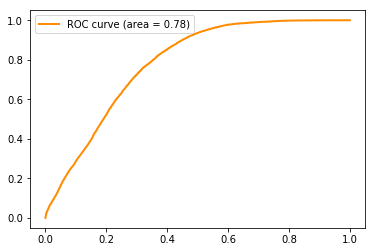

In [109]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(np.ravel(Y_validation), p_test)
# fpr["micro"], tpr["micro"], _ = roc_curve(clean_Y_test.ravel(), y_pred_label.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw= 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()

## rebalanced xgboost 

### ---Reblance X_train

In [110]:
Pos_train = X_train[Y_train == 1]
Neg_train = X_train[Y_train == 0]

In [111]:


# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(Pos_train) / (len(Pos_train) + len(Neg_train))) / p) - 1
while scale > 1:
    Neg_train = pd.concat([Neg_train, Neg_train])
    scale -=1
Neg_train = pd.concat([Neg_train, Neg_train[:int(scale * len(Neg_train))]])
print(len(Pos_train) / (len(Pos_train) + len(Neg_train)))

X_train_b = pd.concat([Pos_train, Neg_train])
Y_train_b = (np.zeros(len(Pos_train)) + 1).tolist() + np.zeros(len(Neg_train)).tolist()
del Pos_train, Neg_train

0.19132107189129868


### ---Relance X_validation

In [112]:
Pos_vali = X_validation[Y_validation == 1]
Neg_vali = X_validation[Y_validation == 0]

In [113]:
# Now we oversample the negative class
# There is likely a much more elegant way to do this...
p = 0.165
scale = ((len(Pos_vali) / (len(Pos_vali) + len(Neg_vali))) / p) - 1
while scale > 1:
    Neg_vali = pd.concat([Neg_vali, Neg_vali])
    scale -=1
Neg_vali = pd.concat([Neg_vali, Neg_vali[:int(scale * len(Neg_vali))]])
print(len(Pos_vali) / (len(Pos_vali) + len(Neg_vali)))

X_vali_b = pd.concat([Pos_vali, Neg_vali])
Y_vali_b = (np.zeros(len(Pos_vali)) + 1).tolist() + np.zeros(len(Neg_vali)).tolist()
del Pos_vali, Neg_vali

0.1909310899669323


In [114]:
Y_vali_b

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

### ---Modeling

In [115]:
params2 = {}
params2['objective'] = 'binary:logistic'
params2['eval_metric'] = 'logloss'
params2['eta'] = 0.02
params2['max_depth'] = 4

d_train_b = xgb.DMatrix(X_train_b, label=Y_train_b)


watchlist = [(d_train_b, 'train')]

bst2 = xgb.train(params2, d_train_b, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.683874
Will train until train-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.60835
[20]	train-logloss:0.555393
[30]	train-logloss:0.517119
[40]	train-logloss:0.488905
[50]	train-logloss:0.467815
[60]	train-logloss:0.451891
[70]	train-logloss:0.439772
[80]	train-logloss:0.430511
[90]	train-logloss:0.423409
[100]	train-logloss:0.417955
[110]	train-logloss:0.413671
[120]	train-logloss:0.410273
[130]	train-logloss:0.407608
[140]	train-logloss:0.405548
[150]	train-logloss:0.403917
[160]	train-logloss:0.402614
[170]	train-logloss:0.401608
[180]	train-logloss:0.400727
[190]	train-logloss:0.400016
[200]	train-logloss:0.399393
[210]	train-logloss:0.398898
[220]	train-logloss:0.398462
[230]	train-logloss:0.398133
[240]	train-logloss:0.397847
[250]	train-logloss:0.397576
[260]	train-logloss:0.397349
[270]	train-logloss:0.397115
[280]	train-logloss:0.396892
[290]	train-logloss:0.396653
[300]	train-logloss:0.396422
[310]	train-logloss:0.396147
[320]	train-logloss:0.3

### ---Fake Test

In [116]:
from sklearn.metrics import log_loss
d_test = xgb.DMatrix(X_vali_b)
p_test = bst2.predict(d_test)
logLoss2=log_loss(Y_vali_b,p_test)
logLoss2

0.3958559843297896

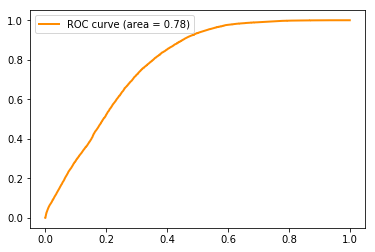

In [117]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(np.ravel(Y_vali_b), p_test)
# fpr["micro"], tpr["micro"], _ = roc_curve(clean_Y_test.ravel(), y_pred_label.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw= 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()

## Gridsearch Original Xgboost 

In [118]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier 

In [119]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
'gamma':[i/10.0 for i in range(0,3)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1,max_depth=5,
min_child_weight=1, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27), 
 param_grid = param_test1,scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_,     gsearch1.best_score_

/Users/yuxiong/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.78227, std: 0.00092, params: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 1},
  mean: 0.78230, std: 0.00089, params: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 3},
  mean: 0.78239, std: 0.00095, params: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 5},
  mean: 0.78942, std: 0.00092, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 1},
  mean: 0.78894, std: 0.00106, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 3},
  mean: 0.78930, std: 0.00119, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 5},
  mean: 0.79311, std: 0.00101, params: {'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 1},
  mean: 0.79286, std: 0.00116, params: {'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 3},
  mean: 0.79309, std: 0.00095, params: {'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 5},
  mean: 0.79414, std: 0.00098, params: {'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1},
  mean: 0.79429, std: 0.00094, params: {'gamma': 0.0, 'max_d

In [174]:
gsearch1.fit(X_train,Y_train)
#gsearch1.grid_scores_, gsearch1.best_params_,     gsearch1.best_score_

KeyboardInterrupt: 

In [175]:
params3 = {}
params3['objective'] = 'binary:logistic'
params3['eval_metric'] = 'logloss'
params3['eta'] = 0.1
params3['max_depth'] = 9
params3['min_child_weight']= 1
params3['gamma']= 0.1

In [121]:
D_train = xgb.DMatrix(X_train, label=Y_train)
#d_valid = xgb.DMatrix(X_validation, label=Y_validation)


watchlist = [(D_train, 'train')]

bst3 = xgb.train(params3, D_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.664739
Will train until train-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.541577
[20]	train-logloss:0.510741
[30]	train-logloss:0.500156
[40]	train-logloss:0.495537
[50]	train-logloss:0.493287
[60]	train-logloss:0.49165
[70]	train-logloss:0.490086
[80]	train-logloss:0.48838
[90]	train-logloss:0.487329
[100]	train-logloss:0.48546
[110]	train-logloss:0.48474
[120]	train-logloss:0.483041
[130]	train-logloss:0.481959
[140]	train-logloss:0.480816
[150]	train-logloss:0.479585
[160]	train-logloss:0.478203
[170]	train-logloss:0.476933
[180]	train-logloss:0.475629
[190]	train-logloss:0.474576
[200]	train-logloss:0.47325
[210]	train-logloss:0.471829
[220]	train-logloss:0.47023
[230]	train-logloss:0.469324
[240]	train-logloss:0.468267
[250]	train-logloss:0.467186
[260]	train-logloss:0.466053
[270]	train-logloss:0.465208
[280]	train-logloss:0.464233
[290]	train-logloss:0.463136
[300]	train-logloss:0.46234
[310]	train-logloss:0.46134
[320]	train-logloss:0.460474
[

In [124]:
from sklearn.metrics import log_loss
d_test = xgb.DMatrix(X_test)
p_test = bst3.predict(d_test)
log_loss(Y_test,p_test)

0.5061292090409224

In [147]:
p_test

array([0.32, 0.01, 0.18, ..., 0.37, 0.59, 0.09], dtype=float32)

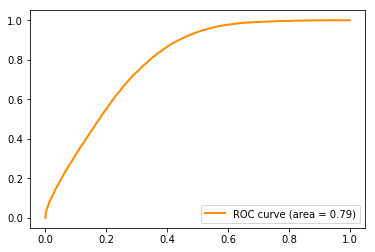

In [153]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(np.ravel(Y_test), p_test)
# fpr["micro"], tpr["micro"], _ = roc_curve(clean_Y_test.ravel(), y_pred_label.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         lw= 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()

In [154]:
params3 = {}
params3['objective'] = 'binary:logistic'
params3['eval_metric'] = 'logloss'
params3['eta'] = 0.1
params3['max_depth'] = 9
params3['min_child_weight']= 1
params3['gamma']= 0.1


In [176]:
Fmodel = XGBClassifier(
 learning_rate =0.1,
 n_estimators=700,
 max_depth=9,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic')

In [178]:
 len(X_train)

283002

112

In [179]:

Fmodel.fit(X_train, Y_train)
# # make predictions for test data
y_pred = Fmodel.predict(X_test)

/Users/yuxiong/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [180]:
from sklearn.metrics import accuracy_score

In [181]:
accuracy_score(Y_test, y_pred)

0.7137574513344381

Normalized confusion matrix
[[0.74 0.26]
 [0.34 0.66]]


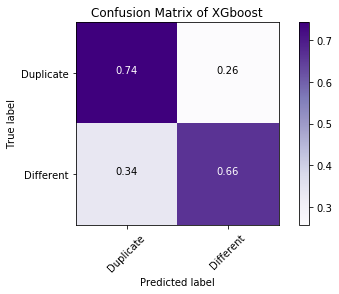

In [193]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with

class_names = ['Duplicate','Different']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion Matrix of XGboost')

plt.show()

## Gridsearch Rebalanced XGboost

In [129]:
X_train_b=X_train_b.reset_index(drop = True)

In [130]:
param_test2 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
'gamma':[i/10.0 for i in range(0,3)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
min_child_weight=1,  subsample=0.8,             colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4,     scale_pos_weight=1, seed=27), 
 param_grid = param_test1,     scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train_b,Y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_,     gsearch2.best_score_

/Users/yuxiong/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.78493, std: 0.00089, params: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 1},
  mean: 0.78489, std: 0.00079, params: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 3},
  mean: 0.78496, std: 0.00079, params: {'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 5},
  mean: 0.79311, std: 0.00082, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 1},
  mean: 0.79304, std: 0.00073, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 3},
  mean: 0.79280, std: 0.00079, params: {'gamma': 0.0, 'max_depth': 5, 'min_child_weight': 5},
  mean: 0.79915, std: 0.00108, params: {'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 1},
  mean: 0.79852, std: 0.00133, params: {'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 3},
  mean: 0.79843, std: 0.00114, params: {'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 5},
  mean: 0.80599, std: 0.00263, params: {'gamma': 0.0, 'max_depth': 9, 'min_child_weight': 1},
  mean: 0.80455, std: 0.00262, params: {'gamma': 0.0, 'max_d

In [131]:
params4 = {}
params4['objective'] = 'binary:logistic'
params4['eval_metric'] = 'logloss'
params4['eta'] = 0.1
params4['max_depth'] = 9
params4['min_child_weight']= 1
params4['gamma']= 0.1

In [132]:
D_train_b = xgb.DMatrix(X_train_b, label=Y_train_b)



watchlist = [(D_train_b, 'train')]

bst4 = xgb.train(params4, D_train_b, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.647522
Will train until train-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.450934
[20]	train-logloss:0.403928
[30]	train-logloss:0.389948
[40]	train-logloss:0.384872
[50]	train-logloss:0.382064
[60]	train-logloss:0.380486
[70]	train-logloss:0.379242
[80]	train-logloss:0.378256
[90]	train-logloss:0.377014
[100]	train-logloss:0.376426
[110]	train-logloss:0.374893
[120]	train-logloss:0.373877
[130]	train-logloss:0.372695
[140]	train-logloss:0.371611
[150]	train-logloss:0.370698
[160]	train-logloss:0.369406
[170]	train-logloss:0.367953
[180]	train-logloss:0.366698
[190]	train-logloss:0.365674
[200]	train-logloss:0.364989
[210]	train-logloss:0.364237
[220]	train-logloss:0.363646
[230]	train-logloss:0.3628
[240]	train-logloss:0.361835
[250]	train-logloss:0.36104
[260]	train-logloss:0.360427
[270]	train-logloss:0.359565
[280]	train-logloss:0.359036
[290]	train-logloss:0.358228
[300]	train-logloss:0.357677
[310]	train-logloss:0.35696
[320]	train-logloss:0.3557

In [134]:
from sklearn.metrics import log_loss
d_test = xgb.DMatrix(X_test)
p_test = bst4.predict(d_test)
log_loss(Y_test,p_test)

0.5675406049080616

In [136]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = metrics.roc_curve(np.ravel(Y_test), p_test)
# fpr["micro"], tpr["micro"], _ = roc_curve(clean_Y_test.ravel(), y_pred_label.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc = auc(fpr, tpr)

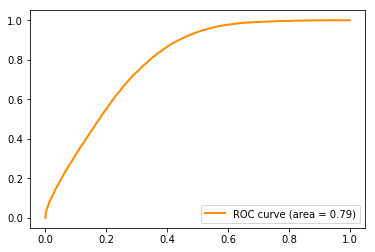

In [137]:
plt.plot(fpr, tpr, color='darkorange',
         lw= 2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend()

In [140]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(np.ravel(Y_test), p_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ValueError: Can't handle mix of binary and continuous

In [146]:
np.ravel(Y_test)

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [145]:
p_test

array([0.32, 0.01, 0.18, ..., 0.37, 0.59, 0.09], dtype=float32)

### Results:
- The XGboost model with all clomns of rebalanced data performs best with smallest log

## KNN with all columns

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(clean_X_train, clean_Y_train) 

In [ ]:
predictions1 = neigh.predict(clean_X_test)

In [ ]:
predictions1

In [ ]:
neigh.score(clean_X_validation, clean_y_validation)